In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('./nba_scraped_data.csv')
df

,#,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,YEAR
0,2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Joel Embiid,PHI,16.0,34.5,32.0,10.3,20.7,49.8,1.1,...,87.8,3.3,8.0,11.3,6.6,1.0,1.9,3.7,37.3,2023-24
2,2,Kevin Durant,PHX,15.0,36.9,31.4,10.7,20.1,53.3,2.3,...,89.1,0.3,6.7,7.1,5.5,0.7,1.2,4.0,31.5,2023-24
3,3,Luka Doncic,DAL,16.0,35.1,30.5,10.5,21.6,48.7,3.8,...,76.5,0.6,7.3,7.9,7.8,1.3,0.4,3.9,31.3,2023-24
4,4,Shai Gilgeous-Alexander,OKC,15.0,34.3,30.4,11.1,20.7,53.4,1.3,...,93.7,0.9,5.3,6.1,6.2,2.3,0.9,2.3,33.5,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,263,Tyler Hansbrough,TOR,74.0,14.3,3.6,1.2,2.2,52.1,0.0,...,69.8,1.4,2.1,3.6,0.3,0.4,0.2,0.3,6.2,2014-15
2565,264,Kendrick Perkins,CLE,68.0,16.9,3.6,1.5,3.3,44.9,0.0,...,50.6,1.3,3.4,4.7,0.8,0.2,0.6,1.4,6.1,2014-15
2566,265,Andre Roberson,OKC,67.0,19.2,3.4,1.4,3.0,45.8,0.3,...,47.9,0.9,2.9,3.8,1.0,0.8,0.4,0.7,6.8,2014-15
2567,266,Jason Maxiell,CHA,61.0,14.4,3.3,1.3,3.1,42.2,0.0,...,57.7,1.4,1.9,3.3,0.3,0.3,0.7,0.5,5.2,2014-15


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       2569 non-null   object 
 1   PLAYER  2559 non-null   object 
 2   TEAM    2559 non-null   object 
 3   GP      2559 non-null   float64
 4   MIN     2559 non-null   float64
 5   PTS     2559 non-null   float64
 6   FGM     2559 non-null   float64
 7   FGA     2559 non-null   float64
 8   FG%     2559 non-null   float64
 9   3PM     2559 non-null   float64
 10  3PA     2559 non-null   float64
 11  3P%     2559 non-null   float64
 12  FTM     2559 non-null   float64
 13  FTA     2559 non-null   float64
 14  FT%     2559 non-null   float64
 15  OREB    2559 non-null   float64
 16  DREB    2559 non-null   float64
 17  REB     2559 non-null   float64
 18  AST     2559 non-null   float64
 19  STL     2559 non-null   float64
 20  BLK     2559 non-null   float64
 21  TOV     2559 non-null   float64
 22  

# Data Cleaning

In [62]:
# Drop rows that have 'NaN' values and '#' column
df = df.dropna()
df = df.drop('#', axis=1)

In [63]:
# Create a rearranged list 
arrange_columns = ['PLAYER', 'YEAR','TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFF']

# Set dataframe to new columns
df = df[arrange_columns]

df.head()

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,Joel Embiid,2023-24,PHI,16.0,34.5,32.0,10.3,20.7,49.8,1.1,...,11.8,87.8,3.3,8.0,11.3,6.6,1.0,1.9,3.7,37.3
2,Kevin Durant,2023-24,PHX,15.0,36.9,31.4,10.7,20.1,53.3,2.3,...,8.5,89.1,0.3,6.7,7.1,5.5,0.7,1.2,4.0,31.5
3,Luka Doncic,2023-24,DAL,16.0,35.1,30.5,10.5,21.6,48.7,3.8,...,7.4,76.5,0.6,7.3,7.9,7.8,1.3,0.4,3.9,31.3
4,Shai Gilgeous-Alexander,2023-24,OKC,15.0,34.3,30.4,11.1,20.7,53.4,1.3,...,7.4,93.7,0.9,5.3,6.1,6.2,2.3,0.9,2.3,33.5
5,Giannis Antetokounmpo,2023-24,MIL,16.0,33.6,29.9,11.4,19.3,59.4,0.4,...,10.4,63.3,2.7,7.9,10.6,4.6,1.2,1.2,4.1,31.8


In [64]:
player_count = df['PLAYER'].nunique()
team_count = df['TEAM'].nunique()

print(f"Number of players: {player_count}")
print(f"Number of teams: {team_count}")

Number of players: 742
Number of teams: 30


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2559 entries, 1 to 2568
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  2559 non-null   object 
 1   YEAR    2559 non-null   object 
 2   TEAM    2559 non-null   object 
 3   GP      2559 non-null   float64
 4   MIN     2559 non-null   float64
 5   PTS     2559 non-null   float64
 6   FGM     2559 non-null   float64
 7   FGA     2559 non-null   float64
 8   FG%     2559 non-null   float64
 9   3PM     2559 non-null   float64
 10  3PA     2559 non-null   float64
 11  3P%     2559 non-null   float64
 12  FTM     2559 non-null   float64
 13  FTA     2559 non-null   float64
 14  FT%     2559 non-null   float64
 15  OREB    2559 non-null   float64
 16  DREB    2559 non-null   float64
 17  REB     2559 non-null   float64
 18  AST     2559 non-null   float64
 19  STL     2559 non-null   float64
 20  BLK     2559 non-null   float64
 21  TOV     2559 non-null   float64
 22  

# Visualization

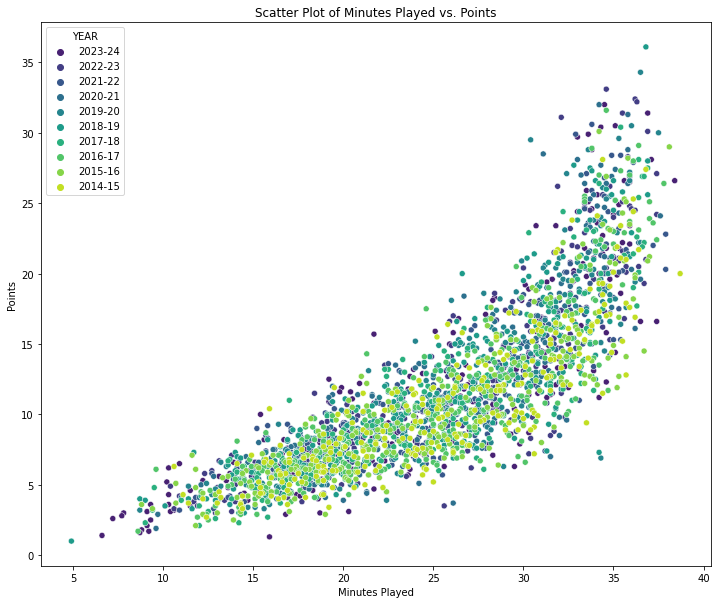

In [66]:
# Create a scatter plot on minutes vs points scored
plt.figure(figsize=(12, 10))
sns.scatterplot(x='MIN', y='PTS', data=df, hue='YEAR', palette='viridis')
plt.title('Scatter Plot of Minutes Played vs. Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.show()


In [67]:
# Create a data frame of players with avg points of 15 or greater
df = df.loc[df['PTS'] >= 15]

In [68]:
# Find the top 10 scorers of the 2022-23 season
top_ten_df = df.loc[df['YEAR'] == '2023-24'].head(10)
top_ten_df.sort_values(by='PTS', ascending=False, inplace=True)
top_ten_df

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,Joel Embiid,2023-24,PHI,16.0,34.5,32.0,10.3,20.7,49.8,1.1,...,11.8,87.8,3.3,8.0,11.3,6.6,1.0,1.9,3.7,37.3
2,Kevin Durant,2023-24,PHX,15.0,36.9,31.4,10.7,20.1,53.3,2.3,...,8.5,89.1,0.3,6.7,7.1,5.5,0.7,1.2,4.0,31.5
3,Luka Doncic,2023-24,DAL,16.0,35.1,30.5,10.5,21.6,48.7,3.8,...,7.4,76.5,0.6,7.3,7.9,7.8,1.3,0.4,3.9,31.3
4,Shai Gilgeous-Alexander,2023-24,OKC,15.0,34.3,30.4,11.1,20.7,53.4,1.3,...,7.4,93.7,0.9,5.3,6.1,6.2,2.3,0.9,2.3,33.5
5,Giannis Antetokounmpo,2023-24,MIL,16.0,33.6,29.9,11.4,19.3,59.4,0.4,...,10.4,63.3,2.7,7.9,10.6,4.6,1.2,1.2,4.1,31.8
6,Stephen Curry,2023-24,GSW,15.0,33.0,29.7,9.2,19.0,48.4,5.3,...,6.4,93.8,0.7,3.9,4.6,3.9,0.8,0.1,3.7,25.3
7,Nikola Jokic,2023-24,DEN,17.0,33.8,28.8,11.4,20.0,56.8,1.4,...,6.0,79.4,3.3,10.1,13.4,8.9,1.2,0.8,3.2,39.9
8,Jayson Tatum,2023-24,BOS,17.0,37.1,28.1,9.8,19.9,49.4,3.2,...,6.5,80.2,0.7,8.2,8.9,4.1,1.2,0.4,3.2,28.1
9,Donovan Mitchell,2023-24,CLE,12.0,35.9,27.0,9.4,20.9,45.0,3.1,...,5.8,88.4,0.8,4.1,4.9,5.3,1.8,0.5,2.3,25.1
10,Tyrese Maxey,2023-24,PHI,17.0,38.4,26.6,9.2,19.9,46.0,3.3,...,5.6,89.5,0.7,4.1,4.8,6.9,0.8,0.7,1.4,27.1


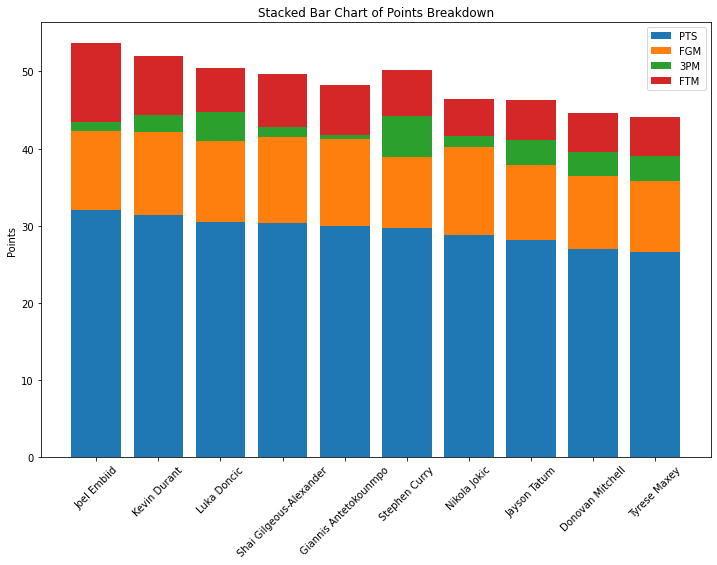

In [69]:
# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Stack the bars for different categories
bottom = None
for col in ['PTS', 'FGM', '3PM', 'FTM']:
    ax.bar(top_ten_df['PLAYER'], top_ten_df[col], label=col, bottom=bottom)
    if bottom is None:
        bottom = top_ten_df[col]
    else:
        bottom += top_ten_df[col]

ax.set_ylabel('Points')
ax.set_title('Stacked Bar Chart of Points Breakdown')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [77]:
# Create a dataframe for players with the most rebounds
top_ten_rebounds = df.loc[df['REB'] > 4].head(10)
top_ten_rebounds = top_ten_rebounds[['PLAYER', 'YEAR', 'MIN', 'PTS', 'REB']]
top_ten_rebounds_sorted = top_ten_rebounds.sort_values(by='REB', ascending=True)

In [78]:
print(top_ten_rebounds_sorted)

                     PLAYER     YEAR   MIN   PTS   REB
6             Stephen Curry  2023-24  33.0  29.7   4.6
10             Tyrese Maxey  2023-24  38.4  26.6   4.8
9          Donovan Mitchell  2023-24  35.9  27.0   4.9
4   Shai Gilgeous-Alexander  2023-24  34.3  30.4   6.1
2              Kevin Durant  2023-24  36.9  31.4   7.1
3               Luka Doncic  2023-24  35.1  30.5   7.9
8              Jayson Tatum  2023-24  37.1  28.1   8.9
5     Giannis Antetokounmpo  2023-24  33.6  29.9  10.6
1               Joel Embiid  2023-24  34.5  32.0  11.3
7              Nikola Jokic  2023-24  33.8  28.8  13.4


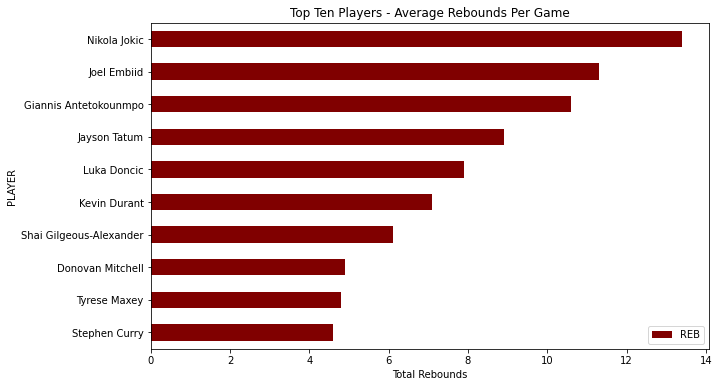

In [79]:
# Plotting bars in descending order
top_ten_rebounds_sorted.plot.barh(x='PLAYER', y='REB', color='maroon', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Total Rebounds')
plt.title('Top Ten Players - Average Rebounds Per Game')

# Display the plot
plt.show()

In [73]:
curry_stats = df.loc[df['PLAYER'] == 'Stephen Curry']
curry_stats

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
6,Stephen Curry,2023-24,GSW,15.0,33.0,29.7,9.2,19.0,48.4,5.3,...,6.4,93.8,0.7,3.9,4.6,3.9,0.8,0.1,3.7,25.3
525,Stephen Curry,2021-22,GSW,64.0,34.5,25.5,8.4,19.1,43.7,4.5,...,4.7,92.3,0.5,4.7,5.2,6.3,1.3,0.4,3.2,24.4
745,Stephen Curry,2020-21,GSW,63.0,34.2,32.0,10.4,21.7,48.2,5.3,...,6.3,91.6,0.5,5.0,5.5,5.8,1.2,0.1,3.4,29.4
1249,Stephen Curry,2018-19,GSW,69.0,33.8,27.3,9.2,19.4,47.2,5.1,...,4.2,91.6,0.7,4.7,5.3,5.2,1.3,0.4,2.8,26.1
1767,Stephen Curry,2016-17,GSW,79.0,33.4,25.3,8.5,18.3,46.8,4.1,...,4.6,89.8,0.8,3.7,4.5,6.6,1.8,0.2,3.0,25.2
2030,Stephen Curry,2015-16,GSW,79.0,34.2,30.1,10.2,20.2,50.4,5.1,...,5.1,90.8,0.9,4.6,5.4,6.7,2.1,0.2,3.3,30.7
2307,Stephen Curry,2014-15,GSW,80.0,32.7,23.8,8.2,16.8,48.7,3.6,...,4.2,91.4,0.7,3.6,4.3,7.7,2.0,0.2,3.1,25.9


In [74]:
# Change 'YEAR' column type from object to numeric
curry_stats['YEAR'] = curry_stats['YEAR'].str.replace(r'-\d+', '', regex=True)
curry_stats['YEAR'] = curry_stats['YEAR'].astype('float')

# Show the change
curry_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 6 to 2307
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  7 non-null      object 
 1   YEAR    7 non-null      float64
 2   TEAM    7 non-null      object 
 3   GP      7 non-null      float64
 4   MIN     7 non-null      float64
 5   PTS     7 non-null      float64
 6   FGM     7 non-null      float64
 7   FGA     7 non-null      float64
 8   FG%     7 non-null      float64
 9   3PM     7 non-null      float64
 10  3PA     7 non-null      float64
 11  3P%     7 non-null      float64
 12  FTM     7 non-null      float64
 13  FTA     7 non-null      float64
 14  FT%     7 non-null      float64
 15  OREB    7 non-null      float64
 16  DREB    7 non-null      float64
 17  REB     7 non-null      float64
 18  AST     7 non-null      float64
 19  STL     7 non-null      float64
 20  BLK     7 non-null      float64
 21  TOV     7 non-null      float64
 22  EFF

C:\Users\User\AppData\Local\Temp\ipykernel_17008\1431455011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curry_stats['YEAR'] = curry_stats['YEAR'].str.replace(r'-\d+', '', regex=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17008\1431455011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curry_stats['YEAR'] = curry_stats['YEAR'].astype('float')


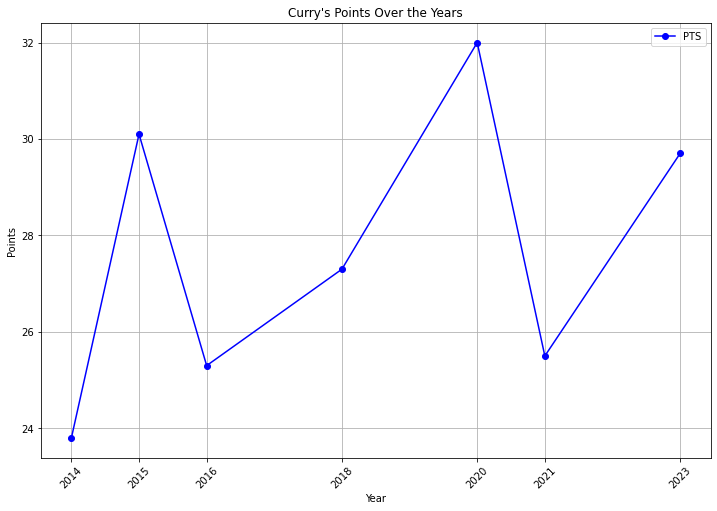

In [75]:
# Create a line chart to show 'PTS' over the years
curry_pts = curry_stats[['YEAR', 'PTS']]

# Plotting
curry_pts.plot.line(x='YEAR', y='PTS', marker='o', color='b', figsize=(12, 8))

# Add labels and title
plt.title("Curry's Points Over the Years")
plt.xlabel('Year')
plt.ylabel('Points')

# Set all years as x-axis ticks
plt.xticks(curry_pts['YEAR'])
plt.xticks(rotation=45)

# Display
plt.grid(True)
plt.show()

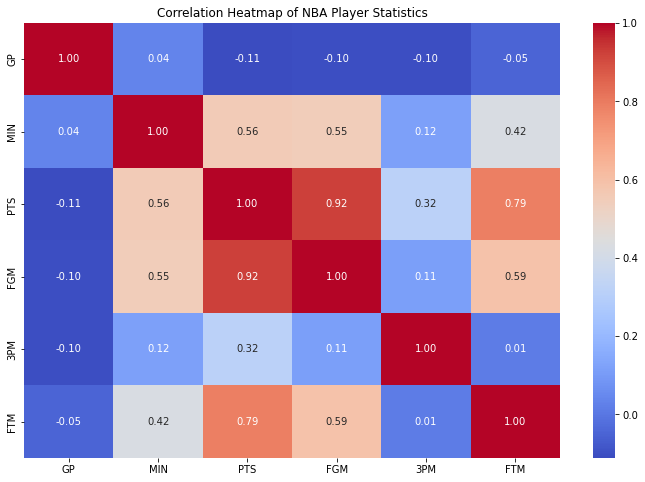

In [80]:
heatmap_columns = ['GP', 'MIN', 'PTS', 'FGM', '3PM', 'FTM']

# Create heatmap dataframe
heatmap_data = df[heatmap_columns]

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of NBA Player Statistics')
plt.show()

In [81]:
# Export cleaned data frame
file_path = 'nba_cleaned_data.csv'
df.to_csv(file_path, index=False)